# Regression Task

In this assignment we will be building an experiment for predicting the compressive strength of concrete given its materials and age. First, import libraries and load the dataset. I have listed some libraries that I used, but you can import whatever libraries you might want to use.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge,Lasso
from sklearn.metrics import r2_score
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error, mean_absolute_error
# These are the libraries/functions I used but don't be afraid import
# additional methods from sklearn if you think they would be useful


Next we will load the dataset and put it into a DataFrame. Column descriptions can be found here:

http://archive.ics.uci.edu/ml/datasets/Concrete+Compressive+Strength

In [ ]:
# The following is code for uploading a file to the colab.research.google 
# environment.

# library for uploading files
from google.colab import files 

def upload_files():
    # initiates the upload - follow the dialogues that appear
    uploaded = files.upload()

    # verify the upload
    for fn in uploaded.keys():
        print('User uploaded file "{name}" with length {length} bytes'.format(
            name=fn, length=len(uploaded[fn])))

    # uploaded files need to be written to file to interact with them
    # as part of a file system
    for filename in uploaded.keys():
        with open(filename, 'wb') as f:
            f.write(uploaded[filename])

In [ ]:
upload_files()

In [7]:
concrete_df = pd.read_csv("compresive_strength_concrete.csv")

In [8]:
# the last column is the target variable, the rest are features
feat_df = concrete_df.iloc[:, :-1]
target_series = concrete_df.iloc[:, -1]

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Now run some EDA on the dataset so you have a feel for what you are looking at. Don't alter the order of the data.

In [9]:
concrete_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   Cement (component 1)(kg in a m^3 mixture)              1030 non-null   float64
 1   Blast Furnace Slag (component 2)(kg in a m^3 mixture)  1030 non-null   float64
 2   Fly Ash (component 3)(kg in a m^3 mixture)             1030 non-null   float64
 3   Water  (component 4)(kg in a m^3 mixture)              1030 non-null   float64
 4   Superplasticizer (component 5)(kg in a m^3 mixture)    1030 non-null   float64
 5   Coarse Aggregate  (component 6)(kg in a m^3 mixture)   1030 non-null   float64
 6   Fine Aggregate (component 7)(kg in a m^3 mixture)      1030 non-null   float64
 7   Age (day)                                              1030 non-null   int64  
 8   Concrete compressive strength(MPa, megapascals)  

In [10]:
concrete_df.head()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [11]:
concrete_df.describe()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


#Main Task

Make a regressor to estimate the strength of concrete. Set up an experiment to learn a predictive model and evaluate its performance. You can use the r2 score in sklearn to evaluate your model:

http://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html#sklearn.metrics.r2_score

You can find more information about regression evaluation metrics here:

http://scikit-learn.org/stable/modules/model_evaluation.html#regression-metrics

The ridge regression class is a good linear model to try here:

http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html

Also, you will need the KFold class for splitting your data into cross validation folds:

http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html

Steps:


*   Use Cross Validation to on the dataset
*   List item



Extras:

* Use scaling (http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler). Does this alter your results at all? What does this tell you about the dataset?
* Compare different regression methods found in sklearn (how does Lasso compare to Ridge? (http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html)
* Fit the Lasso method (http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html) and then look at the `coef_` attribute. What does that tell you about the feature set?
* Try different evaluation metrics




In [12]:
kf = KFold(n_splits = 5, shuffle = True)


preds = []
lbls = []

for train_index, test_index in kf.split(feat_df):
  train_features = feat_df.iloc[train_index,:]
  train_labels = target_series.iloc[train_index]

  #using ridge regression model on the training dataset:
  
  model = Ridge()  #set up the model instance
  model.fit(train_features, train_labels) #fits on training data

  test_features = feat_df.iloc[test_index,:]
  test_labels = target_series.iloc[test_index]

  test_preds = model.predict(test_features) #predicts on test data
  preds.extend(test_preds)
  lbls.extend(test_labels)

  print (f"Training size: {len(train_features)}, Test size: {len(test_features)}")
  print(f"The mean absolute error for this training set is {mean_absolute_error(test_labels, test_preds)}")
  print(f"The mean squared error for this training set it {mean_squared_error(test_labels, test_preds)}")
  print(f"The R2 score for this training set is {r2_score(test_labels, test_preds)}\n")

# R2 score needs actual labels vs model labels

print(f"the mean absolute error for cross validated set is {mean_absolute_error(lbls, preds)}")
print(f"the mean squared error for cross validated set is {mean_squared_error(lbls, preds)}")
print(f"the r2 score for cross validated set is {r2_score(lbls, preds)} \m")


ridge_coeff = model.coef_
print(f"The weight coefficient is: {ridge_coeff}") 

# this is taking coefficient fo the last cross validation model.
# in reality, should be taking for across the full set of data

Training size: 824, Test size: 206
The mean absolute error for this training set is 8.899632263161926
The mean squared error for this training set it 123.47014038649084
The R2 score for this training set is 0.5956676929339693

Training size: 824, Test size: 206
The mean absolute error for this training set is 7.361889209734908
The mean squared error for this training set it 83.67537760437854
The R2 score for this training set is 0.6628999642030791

Training size: 824, Test size: 206
The mean absolute error for this training set is 8.322378868690118
The mean squared error for this training set it 118.3839610424371
The R2 score for this training set is 0.5411758841207965

Training size: 824, Test size: 206
The mean absolute error for this training set is 7.998159471830867
The mean squared error for this training set it 97.44542546223224
The R2 score for this training set is 0.6137538532908716

Training size: 824, Test size: 206
The mean absolute error for this training set is 8.943263379

In [13]:
# LASSO REGRESSION


kf = KFold(n_splits = 5, shuffle = True)


preds = []
lbls = []

for train_index, test_index in kf.split(feat_df):
  train_features = feat_df.iloc[train_index,:]
  train_labels = target_series.iloc[train_index]

  #using lasso regression model on the training dataset:
  
  model = Lasso(alpha = 5)  #set up the model instance
  model.fit(train_features, train_labels) #fits on training data

  test_features = feat_df.iloc[test_index,:]
  test_labels = target_series.iloc[test_index]

  test_preds = model.predict(test_features) #predicts on test data
  preds.extend(test_preds)
  lbls.extend(test_labels)

  print (f"Training size: {len(train_features)}, Test size: {len(test_features)}")
  print(f"The mean absolute error for this training set is {mean_absolute_error(test_labels, test_preds)}")
  print(f"The mean squared error for this training set it {mean_squared_error(test_labels, test_preds)}")
  print(f"The R2 score for this training set is {r2_score(test_labels, test_preds)}\n")

# R2 score needs actual labels vs model labels

print(f"the mean absolute error for cross validated set is {mean_absolute_error(lbls, preds)}")
print(f"the mean squared error for cross validated set is {mean_squared_error(lbls, preds)}")
print(f"the r2 score for cross validated set is {r2_score(lbls, preds)}\n")

lasso_coeff = model.coef_
print(f"The weight coefficient is: {lasso_coeff}") 

# this is taking coefficient fo the last cross validation model.
# in reality, should be taking for across the full set of data


Training size: 824, Test size: 206
The mean absolute error for this training set is 8.374068868445162
The mean squared error for this training set it 105.94057429170779
The R2 score for this training set is 0.6367633635848304

Training size: 824, Test size: 206
The mean absolute error for this training set is 7.539977884062555
The mean squared error for this training set it 94.52542938602164
The R2 score for this training set is 0.5993023174843439

Training size: 824, Test size: 206
The mean absolute error for this training set is 7.951467748779346
The mean squared error for this training set it 102.53510787648321
The R2 score for this training set is 0.5925155543386285

Training size: 824, Test size: 206
The mean absolute error for this training set is 8.983665121112251
The mean squared error for this training set it 126.71681951677806
The R2 score for this training set is 0.569081974381765

Training size: 824, Test size: 206
The mean absolute error for this training set is 8.77478529

In [14]:
feat_df_columns = [each[:each.find("(")-1] for each in list(feat_df.columns)]

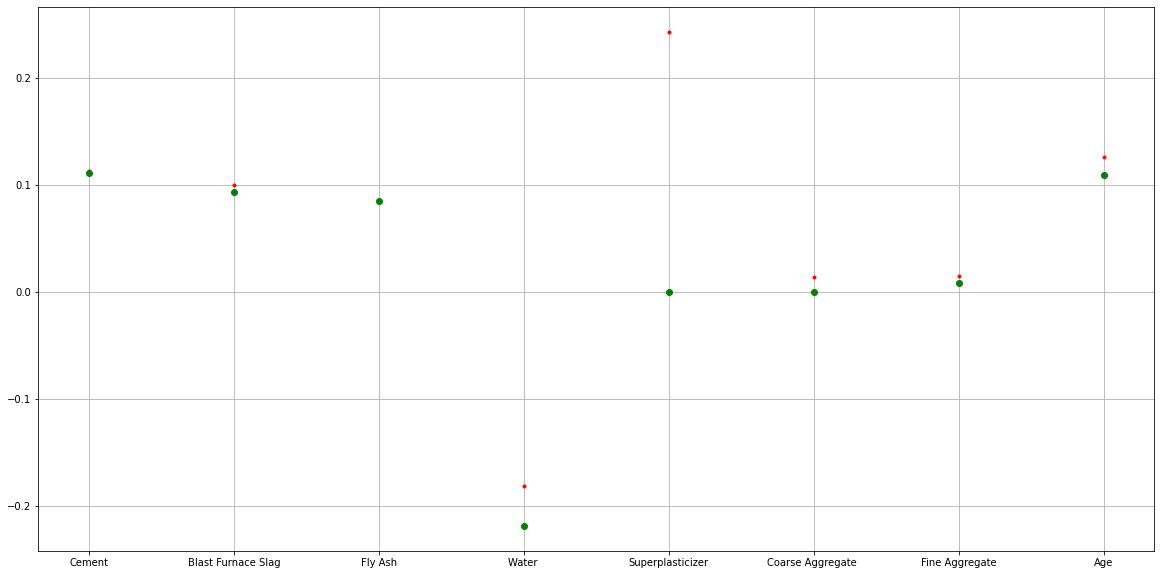

In [15]:
plt.figure(figsize=(20,10))

plt.plot(feat_df_columns,ridge_coeff,'r.')
plt.plot(feat_df_columns,lasso_coeff,'go')

plt.grid()

In [ ]:
# difference between Kfold and Strat K fold?

# 

In [16]:
kf = KFold(n_splits = 5, shuffle = True)


preds = []
lbls = []

for train_index, test_index in kf.split(feat_df):
  train_features = feat_df.iloc[train_index,:]
  train_labels = target_series.iloc[train_index]

  #using ridge regression model on the training dataset:
  scaler = StandardScaler()

  train_features = scaler.fit_transform(train_features)

  model = Ridge()  #set up the model instance
  model.fit(train_features, train_labels) #fits on training data


  test_features = feat_df.iloc[test_index,:]
  test_labels = target_series.iloc[test_index]

  test_features = scaler.transform(test_features)

  test_preds = model.predict(test_features) #predicts on test data
  preds.extend(test_preds)
  lbls.extend(test_labels)

  print (f"Training size: {len(train_features)}, Test size: {len(test_features)}")
  print(f"The mean absolute error for this training set is {mean_absolute_error(test_labels, test_preds)}")
  print(f"The mean squared error for this training set it {mean_squared_error(test_labels, test_preds)}")
  print(f"The R2 score for this training set is {r2_score(test_labels, test_preds)}\n")

# R2 score needs actual labels vs model labels

print(f"the mean absolute error for cross validated set is {mean_absolute_error(lbls, preds)}")
print(f"the mean squared error for cross validated set is {mean_squared_error(lbls, preds)}")
print(f"the r2 score for cross validated set is {r2_score(lbls, preds)} \m")

ridge_coeff_scaled = model.coef_
print(f"The weight coefficient is: {ridge_coeff}") 

# this is taking coefficient fo the last cross validation model.
# in reality, should be taking for across the full set of data

Training size: 824, Test size: 206
The mean absolute error for this training set is 7.649600747818413
The mean squared error for this training set it 96.00080515867269
The R2 score for this training set is 0.6255497130455835

Training size: 824, Test size: 206
The mean absolute error for this training set is 8.864807040464067
The mean squared error for this training set it 122.05092734703504
The R2 score for this training set is 0.563029107338948

Training size: 824, Test size: 206
The mean absolute error for this training set is 9.130252222844714
The mean squared error for this training set it 131.3492161121633
The R2 score for this training set is 0.5455992348740629

Training size: 824, Test size: 206
The mean absolute error for this training set is 8.045740728507326
The mean squared error for this training set it 97.397662394532
The R2 score for this training set is 0.6476831060266

Training size: 824, Test size: 206
The mean absolute error for this training set is 7.841808598445179

In [17]:
lasso_coeff

array([ 0.11106116,  0.0930515 ,  0.08533176, -0.21904318,  0.        ,
       -0.        ,  0.00806554,  0.10943745])

In [18]:
ridge_coeff



array([ 0.11332883,  0.09967101,  0.08411136, -0.18137231,  0.24300788,
        0.01385302,  0.0147431 ,  0.12563754])

In [19]:
ridge_coeff_scaled



array([12.24607858,  8.77973736,  5.38760531, -3.23119458,  1.64716534,
        1.36245696,  1.37599725,  7.19235313])

In [ ]:
#Alpha is a scaling factor

# if alpha = 0, you dont look at how complex model is

# if alpha very high, looks more on model complexity - the higher the weight, the complex the models

In [ ]:
# Model registry